In [ ]:
# https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews

In [1]:
# Importing Python libraries and modules commonly used for data analysis
# natural language processing, and machine learning tasks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings("ignore")

import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.utils import to_categorical

In [2]:
# Importing our training dataset
df = pd.read_csv('train.csv' , header = None)

In [3]:
# Importing out test dataset
df_test = pd.read_csv('test.csv', header = None)

In [4]:
# Get the shape(number of rows and columns)
df.shape

(3600000, 3)

In [5]:
# Get the shape(number of rows and columns)
df_test.shape

(400000, 3)

In [6]:
# Randomly shuffling all the rows in the dataframes
df = df.sample(100_000)
df = df.sample(len(df))
df_test = df_test.sample(len(df_test)) 

In [7]:
# Creating a new column called 'title_text' in both dataframes
df['title_text'] = df[1] + ' ' + df[2]
df_test['title_text'] = df_test[1] + ' ' + df_test[2]

In [8]:
# Display the first few rows of the DataFrame
df.head()

,0,1,2,title_text
2394220,1,Stopping remaking classic TV,This is destined to go into the cinematic tras...,Stopping remaking classic TV This is destined ...
1345650,1,Cheap and flimsy,I love this product and have used the Black an...,Cheap and flimsy I love this product and have ...
389620,1,Stella doll,The pacifier has a magnet in it that I was afr...,Stella doll The pacifier has a magnet in it th...
1125874,2,Two are better than one,This volume of two Paula Vogel plays is a very...,Two are better than one This volume of two Pau...
2110430,1,Not good,Not what I expected it to be. Much larger than...,Not good Not what I expected it to be. Much la...


In [9]:
# Display the first few rows of the DataFrame
df_test.head()

,0,1,2,title_text
100964,2,An excellent video for the young people .,This movie will keep you laughing the whole wa...,An excellent video for the young people . This...
17588,2,Useful and fun to build,"A nice unit for the hobbyist electronic, I've ...",Useful and fun to build A nice unit for the ho...
155586,1,Would be great if it didn't have so many probl...,"I think this program would be great, but it ke...",Would be great if it didn't have so many probl...
82604,1,BADLY edited! Not what you expect,I am a big Survivor fan and I was disappointed...,BADLY edited! Not what you expect I am a big S...
104508,1,A tedious 382 pages,Mr. Venkatesh obviously immersed himself in th...,A tedious 382 pages Mr. Venkatesh obviously im...


In [10]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 2394220 to 462854
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   0           100000 non-null  int64 
 1   1           99996 non-null   object
 2   2           100000 non-null  object
 3   title_text  99996 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.8+ MB


In [11]:
# Display information about the DataFrame
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400000 entries, 100964 to 367986
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   0           400000 non-null  int64 
 1   1           399990 non-null  object
 2   2           400000 non-null  object
 3   title_text  399990 non-null  object
dtypes: int64(1), object(3)
memory usage: 15.3+ MB


In [12]:
df['title_text'].value_counts()

Stopping remaking classic TV This is destined to go into the cinematic trash can along with the abomination that was "Thunderbirds".Please someone tell movie execs top lay off cult TV shows.The ONLY movie adapted from a TV program that worked was "The Fugitive".If the movie industry is batting 1 for a zillion, they should stop what they are doing and invest in some ORIGINAL IDEAS.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           1
Sony battery charger To char

In [13]:
# Remove rows containing missing values (NaN or None) 
df_test.dropna(inplace = True)

In [14]:
# Create a new column 'label' in the DataFrame 'df' based on a condition
# This line checks if the values in column 0 (assumed to be a binary indicator) are equal to 1
# If the value is 1, it assigns 0 to the 'label' column; otherwise, it assigns 1
df['label'] = df[0].apply(lambda x: 0 if x == 1 else 1) 

In [15]:
# Create a similar 'label' column in the DataFrame 'df_test' based on a condition
# This line checks if the values in column 0 of 'df_test' are equal to 1
# If the value is 1, it assigns 0 to the 'label' column; otherwise, it assigns 1
df_test['label'] = df_test[0].apply(lambda x: 0 if x == 1 else 1) 

In [16]:
# Create a NumPy array 'x_train' containing the 'title_text' column values from 'df'
x_train = np.array(df['title_text'] , dtype = 'str')
x_train[:3]

array(['Stopping remaking classic TV This is destined to go into the cinematic trash can along with the abomination that was "Thunderbirds".Please someone tell movie execs top lay off cult TV shows.The ONLY movie adapted from a TV program that worked was "The Fugitive".If the movie industry is batting 1 for a zillion, they should stop what they are doing and invest in some ORIGINAL IDEAS.',
       'Cheap and flimsy I love this product and have used the Black and Decker steamer almost on a daily basis for the last 15 years. This would be my fourth one over that time period. I ordered this when my last one stopped working. This product does not compare AT ALL to the prior versions. The clear plastic bin is very thin and flimsy. There is no longer a fill line inside and the new method for putting water in does not work. Half the time I end up spilling water all over the counter. I am expecting this to be broken within the next 6 months where the prior models lasted me over 5 years each. I

In [17]:
# Create a NumPy array 'y_train' containing the 'label' column values from 'df'
y_train = np.array(df['label'] , dtype = 'int32')

In [18]:
# Create a NumPy array 'x_test' containing the 'title_text' column values from 'df_test'
x_test = np.array(df_test['title_text'] , dtype = 'str')

# Create a NumPy array 'y_test' containing the 'label' column values from 'df_test'
y_test = np.array(df_test['label'] , dtype = 'int32')

In [19]:
# See the newly created array
y_test

array([1, 1, 0, ..., 0, 1, 0])

In [20]:
# Calculating the average length of items in the 'x_train' list
average_len = np.mean([len(item) for item in x_train])

In [21]:
# Display the average length of comments 
print(f'Length of a sample review: {average_len}')

Length of a sample review: 429.88618


In [22]:
# Calculating the maximum length 'max_len' by adding 100 to the 'average_len'
max_len = int(average_len + 100)

In [23]:
# Create a Tokenizer with a vocabulary size of 10,000 and a special token for out-of-vocabulary words
tokenizer = Tokenizer(num_words = 10_000 , oov_token='<OOV>')

# Fit the Tokenizer on the training text data 'x_train'
tokenizer.fit_on_texts(x_train)

# Convert the training and test text data into sequences of integers using the Tokenizer
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)

In [24]:
# Pad the training sequences to the maximum length
train_pad = pad_sequences(train_seq , maxlen = max_len )

# Pad the test sequences to the maximum length
test_pad = pad_sequences(test_seq , maxlen = max_len )

In [25]:
# Convert the categorical labels 'y_train' into one-hot encoded format
train_label = to_categorical(y_train) 

# Convert the categorical labels 'y_test' into one-hot encoded format
test_label = to_categorical(y_test)

In [26]:
# Display the array
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [27]:
# Create a sequential model
model = Sequential([
    # Embedding layer with 10,000 input dimensions and 16 output dimensions
    Embedding(10_000, 16),

    # Bidirectional LSTM layer with 16 units and return_sequences=True
    Bidirectional(LSTM(16, return_sequences=True)),

    # BatchNormalization layer
    BatchNormalization(),

    # Bidirectional LSTM layer with 32 units
    Bidirectional(LSTM(32)),

    # Dropout layer with a dropout rate of 20%
    Dropout(0.2),

    # Dense (fully connected) layer with 512 units and ReLU activation
    Dense(512, activation='relu'),

    # Output layer with 1 unit and sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Display a summary of the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 bidirectional (Bidirection  (None, None, 32)          4224      
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, None, 32)          128       
 Normalization)                                                  
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [28]:
# Compile the model
model.compile(loss = 'binary_crossentropy', # Binary cross-entropy loss for binary classification
              optimizer = 'adam',           # Adam optimizer
              metrics = ['accuracy'])       # Metric to monitor during training (accuracy)

In [29]:
%%time
# Train the model using the training data
modelled_data = model.fit(
    train_pad,              # Input training data (padded sequences)
    y_train,                # Target labels (categorical labels)
    validation_split=0.1,   # Fraction of the training data to use for validation
    epochs=10               # Number of training epochs
)

Epoch 1/10
2813/2813 [==============================] - 473s 167ms/step - loss: 0.3090 - accuracy: 0.8675 - val_loss: 0.2326 - val_accuracy: 0.9083
Epoch 2/10
2813/2813 [==============================] - 462s 164ms/step - loss: 0.1934 - accuracy: 0.9261 - val_loss: 0.2124 - val_accuracy: 0.9128
Epoch 3/10
2813/2813 [==============================] - 456s 162ms/step - loss: 0.1491 - accuracy: 0.9446 - val_loss: 0.2143 - val_accuracy: 0.9173
Epoch 4/10
2813/2813 [==============================] - 453s 161ms/step - loss: 0.1146 - accuracy: 0.9596 - val_loss: 0.2227 - val_accuracy: 0.9142
Epoch 5/10
2813/2813 [==============================] - 462s 164ms/step - loss: 0.0866 - accuracy: 0.9712 - val_loss: 0.2706 - val_accuracy: 0.9078
Epoch 6/10
2813/2813 [==============================] - 466s 166ms/step - loss: 0.0666 - accuracy: 0.9783 - val_loss: 0.2794 - val_accuracy: 0.9137
Epoch 7/10
2813/2813 [==============================] - 471s 168ms/step - loss: 0.0527 - accuracy: 0.9833 - val_

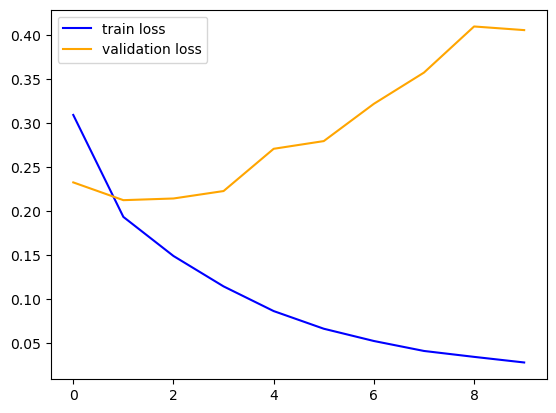

In [30]:
# Extract training loss values from the training history
loss = modelled_data.history['loss']

# Extract validation loss values from the training history
val_loss = modelled_data.history['val_loss']

# Plot the training loss and validation loss over epochs
plt.plot(loss, 'b', label='train loss')        # Blue line for training loss
plt.plot(val_loss, 'orange', label='validation loss')  # Orange line for validation loss

# Add a legend to the plot to distinguish training and validation loss
plt.legend()

# Display the plot
plt.show()

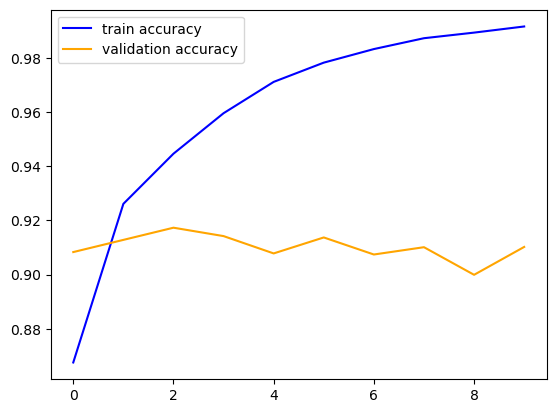

In [31]:
# Extract training accuracy values from the training history
acc = modelled_data.history['accuracy']

# Extract validation accuracy values from the training history
val_acc = modelled_data.history['val_accuracy']

# Plot the training accuracy and validation accuracy over epochs
plt.plot(acc, 'b', label='train accuracy')           # Blue line for training accuracy
plt.plot(val_acc, 'orange', label='validation accuracy')  # Orange line for validation accuracy

# Add a legend to the plot to distinguish training and validation accuracy
plt.legend()

# Display the plot
plt.show()

In [32]:
# Evaluate the trained model on the test data
model.evaluate(test_pad , y_test)

12500/12500 [==============================] - 492s 39ms/step - loss: 0.4208 - accuracy: 0.9073


[0.42079469561576843, 0.907345175743103]

In [33]:
# Save the entire model as a `.keras` zip archive.
model.save('ST10114735 PDAN Task 1 - Amazon.keras')

In [34]:
# Save model and its architecture 
model.save('ST10114735 PDAN Task 1.h5')

In [35]:
# Load our pre-trained Keras model from the file we saved earlier
new_model = tf.keras.models.load_model('ST10114735 PDAN Task 1 - Amazon.keras')

# Display a summary of the loaded model's architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 bidirectional (Bidirection  (None, None, 32)          4224      
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, None, 32)          128       
 Normalization)                                                  
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [36]:
%%time
# Evaluate the restored model
loss, acc = new_model.evaluate(test_pad, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

y_pred = new_model.predict(test_pad)
print(y_pred.shape)

12500/12500 - 465s - loss: 0.4208 - accuracy: 0.9073 - 465s/epoch - 37ms/step
Restored model, accuracy: 90.73%
12500/12500 [==============================] - 467s 37ms/step
(399990, 1)
CPU times: total: 1h 20min 17s
Wall time: 15min 35s


In [37]:
y_pred=np.argmax(y_pred, axis=1)

Text(50.722222222222214, 0.5, 'y_pred')

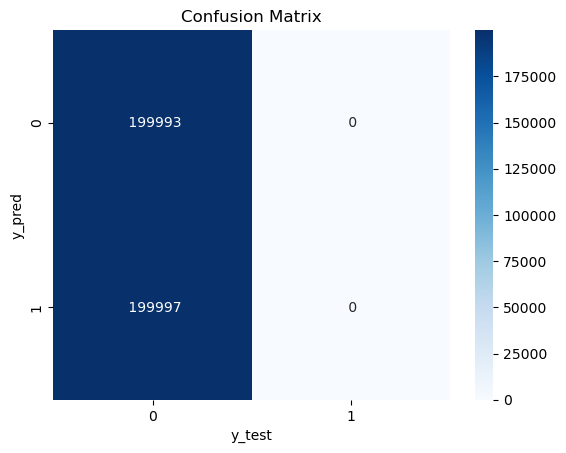

In [38]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    199993
           1       0.00      0.00      0.00    199997

    accuracy                           0.50    399990
   macro avg       0.25      0.50      0.33    399990
weighted avg       0.25      0.50      0.33    399990



In [43]:
# Postive Sentiment
pred_model = tf.keras.models.load_model('ST10114735 PDAN Task 1 - Amazon.keras')
sequence = tokenizer.texts_to_sequences(['this amazon product is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
print(pred)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 31ms/step
[[0.9292794]]
Positive


In [44]:
# Negative Sentiment
sequence = tokenizer.texts_to_sequences(['worst purchase ive made in my life ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
print(pred)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 31ms/step
[[0.00055715]]
Negative


In [56]:
# Positive again seeing a pattern here
# Dataset might be overfit because its either super positive or super negative scores
# If my hardware would work with my I would try and train more samples
sequence = tokenizer.texts_to_sequences(['im happy with the quality of the item'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
print(pred)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 32ms/step
[[0.99856895]]
Positive


In [55]:
# Trying to get a score thats not 0.9 or 0.0x
sequence = tokenizer.texts_to_sequences(['not the best, but not the worst'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
print(pred)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 32ms/step
[[0.01428914]]
Negative


In [51]:
# Lets try a more neutral review
sequence = tokenizer.texts_to_sequences(['this toy car is slower than advertised but at least its working'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
print(pred)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 33ms/step
[[0.767312]]
Positive


In [57]:
# Lets try a longer review
# Definitely overfit that or I trained the model too much
# Which could be a possibility due to my incompetance
sequence = tokenizer.texts_to_sequences(['Cheap and flimsy yet I love this product and have used the this product almost on a daily basis for the last 15 years. This would be my fourth one over that time period. I ordered this when my last one stopped working.'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
print(pred)
if pred > 0.5:
  print('Positive')
else:


1/1 [==============================] - 0s 36ms/step
[[0.00207126]]
Negative
